In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, adfuller
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data into a pandas dataframe
dfy = pd.read_csv('C:\\Users\\villain\\Downloads\\nity18442004.csv')


In [3]:
#Figure 1.2
dfy

,x
0,8.5
1,8.3
2,9.7
3,8.9
4,8.5
...,...
156,9.2
157,8.8
158,9.5
159,9.3


In [4]:
#Figure 2
null_values = dfy.isnull()
na=dfy.isna()
print(null_values.sum())
print(na.sum())

x    0
dtype: int64
x    0
dtype: int64


In [5]:
#Figure 1.2
dfy.describe()


,x
count,161.000000
mean,8.488820
std,0.525475
min,6.700000
25%,8.200000
50%,8.500000
75%,8.800000
max,9.700000


In [6]:
#Figure 3.2
# creating a list of dates
dates = pd.date_range(start='1844-01-01', end='2004-12-01', freq='YS')

# creating a Series object
df = pd.Series(dfy['x'], index=dates)
df = dfy.squeeze()
df.index = dates


In [7]:
df

1844-01-01    8.5
1845-01-01    8.3
1846-01-01    9.7
1847-01-01    8.9
1848-01-01    8.5
             ... 
2000-01-01    9.2
2001-01-01    8.8
2002-01-01    9.5
2003-01-01    9.3
2004-01-01    9.5
Freq: AS-JAN, Name: x, Length: 161, dtype: float64

In [8]:
#Figure 4.2
adf_test = adfuller(df)
print('ADF test statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical values:', adf_test[4])

ADF test statistic: -1.3523756587488223
p-value: 0.604883117433248
Critical values: {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


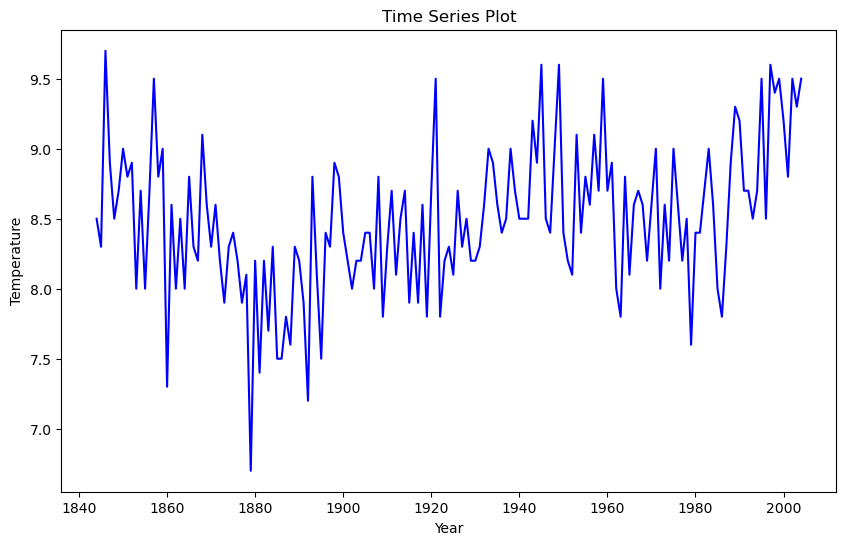

In [9]:
#Figure 5.2
import pandas as pd
import matplotlib.pyplot as plt

# ploting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, color='blue')
plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()





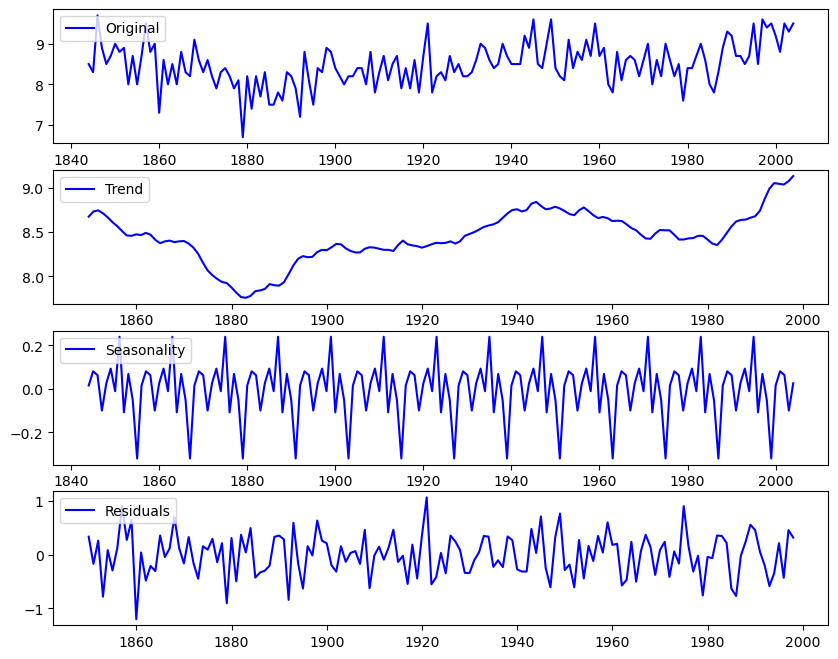

In [10]:
#Figure 6.2
# ploting the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

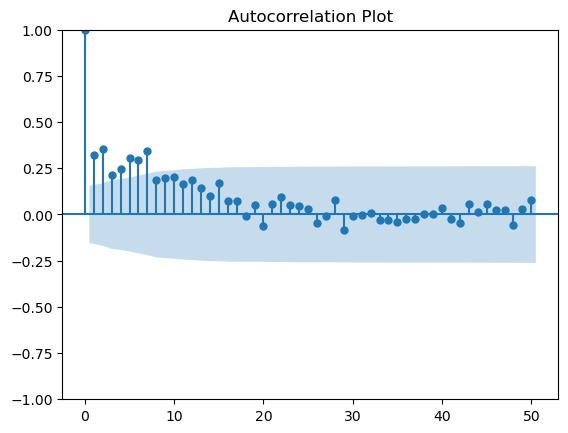

<Figure size 1000x600 with 0 Axes>

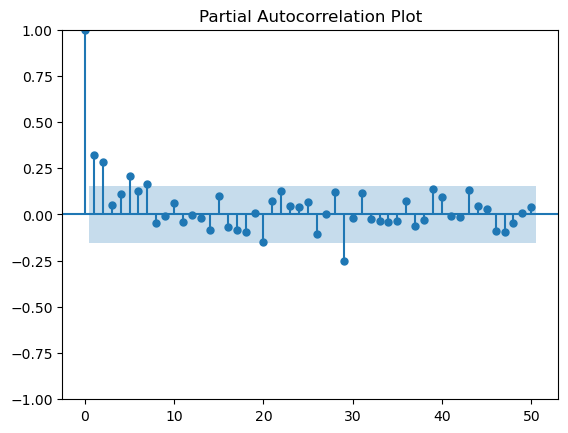

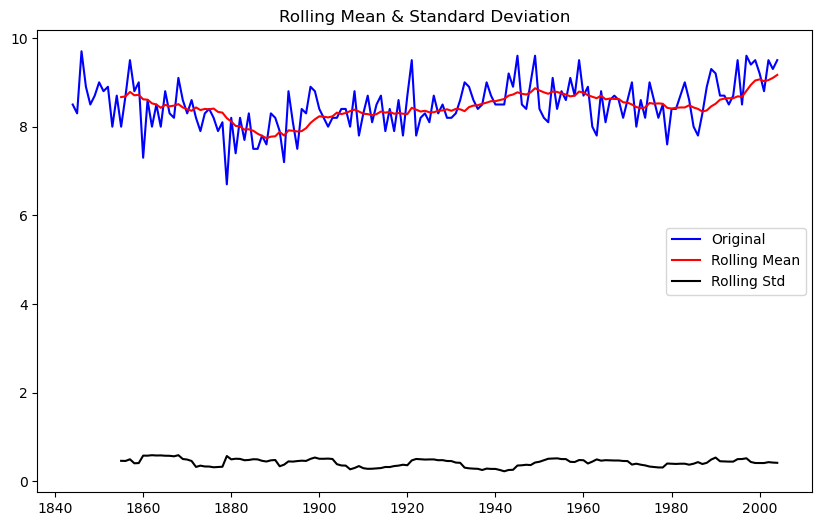

In [11]:
#Figure 7.2
# ploting the autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df, lags=50)
plt.title('Autocorrelation Plot')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(df, lags=50)
plt.title('Partial Autocorrelation Plot')
plt.show()

# plot the rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(df, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [12]:
# Spliting the data into training and testing sets
train = df.loc[:'2003']
test = df.loc['2004']
test

2004-01-01    9.5
Freq: AS-JAN, Name: x, dtype: float64

In [13]:
# Exponential smoothing
model_es = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(test))
# hot linear
model_holt = ExponentialSmoothing(train,trend='add', damped=False)
fit_holt= model_holt.fit()
predictions_holt = fit_holt.forecast(len(test))
#olt winter

model_hw = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add',damped=True)
fit_hw=model_hw.fit()
predictions_hw = fit_hw.forecast(len(test))
#damped trend
# fit model
model_damped = ExponentialSmoothing(train, trend='add', damped=True).fit()
predictions_damped = model_damped.forecast(len(test))

model_arima = ARIMA(train, order=(7, 1, 2))
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(len(test))
# Simple exponential 
model_ses = SimpleExpSmoothing(train)
fit_ses= model_ses.fit()
pred_ses = fit_ses.forecast(len(test))
#random walk
result = seasonal_decompose(train, model='additive', period=1)
seasonal = result.seasonal
forecast_rw = test.shift(1)

# Seasonal Naive model
seasonal_naive_model = sm.tsa.UnobservedComponents(train, 'local level', seasonal=12)
fit_snaive=seasonal_naive_model.fit()
forecast_snaive = fit_snaive.forecast(steps=len(test))



In [14]:
forecast_rw = forecast_rw.fillna(0)

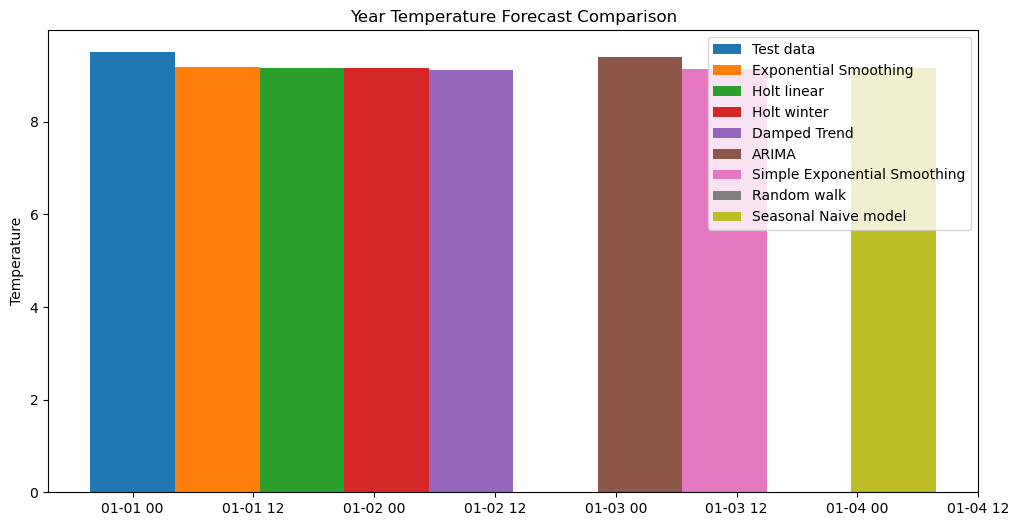

In [15]:
#Figure 10.2 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


# seting the figure size and the width of the bars
plt.figure(figsize=(12, 6))
bar_width = 0.35

# ploting the actual and predicted values as bars
plt.bar(test.index, test.values, width=bar_width, label='Test data')
plt.bar(forecast_es.index + dt.timedelta(days=1)*bar_width, forecast_es.values, width=bar_width, label='Exponential Smoothing')
plt.bar(predictions_holt.index + dt.timedelta(days=1)*bar_width*2, predictions_holt.values, width=bar_width, label='Holt linear')
plt.bar(predictions_hw.index + dt.timedelta(days=1)*bar_width*3, predictions_hw.values, width=bar_width, label='Holt winter')
plt.bar(predictions_damped.index + dt.timedelta(days=1)*bar_width*4, predictions_damped.values, width=bar_width, label='Damped Trend')
plt.bar(forecast_arima.index + dt.timedelta(days=1)*bar_width*6, forecast_arima.values, width=bar_width, label='ARIMA')
plt.bar(pred_ses.index + dt.timedelta(days=1)*bar_width*7, pred_ses.values, width=bar_width, label='Simple Exponential Smoothing')
plt.bar(forecast_rw.index + dt.timedelta(days=1)*bar_width*8, forecast_rw.values, width=bar_width, label='Random walk')
plt.bar(forecast_snaive.index + dt.timedelta(days=1)*bar_width*9, forecast_snaive.values, width=bar_width, label='Seasonal Naive model')
plt.ylabel('Temperature')
plt.title('Year Temperature Forecast Comparison')
plt.legend()
plt.show()


In [16]:
from tabulate import tabulate
test = test.reset_index(drop=True)

forecast_es= forecast_es.reset_index(drop=True)
predictions_holt= predictions_holt.reset_index(drop=True)
predictions_hw= predictions_hw.reset_index(drop=True)
predictions_damped= predictions_damped.reset_index(drop=True)
forecast_arima= forecast_arima.reset_index(drop=True)
pred_ses= pred_ses.reset_index(drop=True)
forecast_rw = forecast_rw.reset_index(drop=True)
forecast_snaive= forecast_snaive.reset_index(drop=True)
row = [ forecast_es,  predictions_holt,predictions_hw,predictions_damped, forecast_arima, pred_ses,forecast_rw, forecast_snaive, test]
head = [ "Exponential Smoothing","Holt Linear","Holt Winter","Damped trend","Arima", "Simple Exponential","Random Walk","Deasonal Naive model", "Test Values"]
table = [row]
print(tabulate(table, headers=head, tablefmt="fancy_grid", floatfmt=".2f"))


╒═════════════════════════╤═══════════════╤═══════════════╤════════════════╤═════════╤══════════════════════╤═══════════════╤════════════════════════╤═══════════════╕
│   Exponential Smoothing │   Holt Linear │   Holt Winter │   Damped trend │   Arima │   Simple Exponential │   Random Walk │   Deasonal Naive model │   Test Values │
╞═════════════════════════╪═══════════════╪═══════════════╪════════════════╪═════════╪══════════════════════╪═══════════════╪════════════════════════╪═══════════════╡
│                    9.19 │          9.16 │          9.15 │           9.12 │    9.40 │                 9.15 │          0.00 │                   9.17 │          9.50 │
╘═════════════════════════╧═══════════════╧═══════════════╧════════════════╧═════════╧══════════════════════╧═══════════════╧════════════════════════╧═══════════════╛


In [17]:
# Calculate evaluation metrics

mse_es = mean_squared_error(test, forecast_es)
mae_es = mean_absolute_error(test, forecast_es)
r2_es = r2_score(test, forecast_es)
rmse_es = mean_squared_error(test, forecast_es, squared=False)
mape_es = mean_absolute_percentage_error(test, forecast_es)

mse_hl = mean_squared_error(test, predictions_holt)
mae_hl = mean_absolute_error(test, predictions_holt)
r2_hl = r2_score(test, predictions_holt)
rmse_hl = mean_squared_error(test, predictions_holt, squared=False)
mape_hl = mean_absolute_percentage_error(test, predictions_holt)

mse_hw = mean_squared_error(test, predictions_hw)
mae_hw = mean_absolute_error(test, predictions_hw)
r2_hw = r2_score(test, predictions_hw)
rmse_hw = mean_squared_error(test, predictions_hw, squared=False)
mape_hw = mean_absolute_percentage_error(test, predictions_hw)

mse_d = mean_squared_error(test, predictions_damped)
mae_d = mean_absolute_error(test, predictions_damped)
r2_d = r2_score(test, predictions_damped)
rmse_d = mean_squared_error(test, predictions_damped, squared=False)
mape_d = mean_absolute_percentage_error(test, predictions_damped)


############################################################################

mse_arima = mean_squared_error(test, forecast_arima)
mae_arima = mean_absolute_error(test, forecast_arima)
r2_arima = r2_score(test, forecast_arima)
rmse_arima = mean_squared_error(test, forecast_arima, squared=False)
mape_arima = mean_absolute_percentage_error(test, forecast_arima)


##################################################################################
mse_ses = mean_squared_error(test, pred_ses)
mae_ses = mean_absolute_error(test, pred_ses)
r2_ses = r2_score(test, pred_ses)
rmse_ses = mean_squared_error(test, pred_ses, squared=False)
mape_ses = mean_absolute_percentage_error(test, pred_ses)

mse_rw = mean_squared_error(test, forecast_rw)
mae_rw = mean_absolute_error(test, forecast_rw)
r2_rw = r2_score(test, forecast_rw)
rmse_rw = mean_squared_error(test, forecast_rw, squared=False)
mape_rw = mean_absolute_percentage_error(test, forecast_rw)

mse_sn = mean_squared_error(test, forecast_snaive)
mae_sn = mean_absolute_error(test, forecast_snaive)
r2_sn = r2_score(test, forecast_snaive)
rmse_sn = mean_squared_error(test, forecast_snaive, squared=False)
mape_sn = mean_absolute_percentage_error(test, forecast_snaive)

In [18]:
#Figure 9.2
# AIC stands for Akaike Information Criterion and BIC stands for Bayesian Information Criterion.
aic_es = fit_es.aic
bic_es = fit_es.bic

aic_hw = fit_hw.aic
bic_hw = fit_hw.bic

aic_holt = fit_holt.aic
bic_holt = fit_holt.bic

aic_damp = fit_holt.aic
bic_damp = fit_holt.bic

aic_ses = fit_ses.aic
bic_ses = fit_ses.bic

aic_arima = fit_arima.aic
bic_arima = fit_arima.bic


aic_snaive = fit_snaive.aic
bic_snaive = fit_snaive.bic
print("Exponential smoothing: ", aic_es, bic_es)
print("Holt winter: ", aic_hw, bic_hw)
print("Holt lineat: ", aic_holt, bic_holt)
print("Damped trend: ", aic_damp, bic_damp)
print("Simple Exponential smoothing: ", aic_ses, bic_ses)
print("ARIMA: ", aic_arima, bic_arima)






Exponential smoothing:  -229.96598920648256 -180.76320816274134
Holt winter:  -229.1471106085295 -176.86915574955444
Holt lineat:  -240.22439233771138 -227.92369707677608
Damped trend:  -240.22439233771138 -227.92369707677608
Simple Exponential smoothing:  -244.00875583324836 -237.8584082027807
ARIMA:  217.94255298618668 248.631595008389


In [19]:
#Figure 8.2
# Evaluating the models based on the evaluation metrics
metrics = pd.DataFrame({'Exponential Smoothing': [mse_es, mae_es, r2_es, rmse_es, mape_es, bic_es],
                        'Holt Linear': [mse_hl, mae_hl, r2_hl, rmse_hl, mape_hl, bic_holt],
                        'Holt winter': [mse_hw, mae_hw, r2_hw, rmse_hw, mape_hw, bic_hw],
                        'Damped trend': [mse_d, mae_d, r2_d, rmse_d, mape_d, bic_damp],
                        'ARIMA': [mse_arima, mae_arima, r2_arima, rmse_arima, mape_arima, bic_arima],
                        'SEASONAL NAIVE': [mse_sn, mae_sn, r2_sn, rmse_sn, mape_sn, bic_snaive],
                        'Random walking': [mse_rw, mae_rw, r2_rw, rmse_rw, mape_rw, 0],
                       'Simple Exponential Smoothing': [mse_ses, mae_ses, r2_ses, rmse_ses, mape_ses, bic_ses]},
                       index=['MSE', 'MAE', 'R2','RMSE','MAPE','BIC'])

print(metrics)



      Exponential Smoothing  Holt Linear  Holt winter  Damped trend  \
MSE                0.096423     0.112850     0.121867      0.143347   
MAE                0.310520     0.335932     0.349094      0.378612   
R2                      NaN          NaN          NaN           NaN   
RMSE               0.310520     0.335932     0.349094      0.378612   
MAPE               0.032686     0.035361     0.036747      0.039854   
BIC             -180.763208  -227.923697  -176.869156   -227.923697   

           ARIMA  SEASONAL NAIVE  Random walking  Simple Exponential Smoothing  
MSE     0.009327        0.109231           90.25                      0.123539  
MAE     0.096575        0.330502            9.50                      0.351481  
R2           NaN             NaN             NaN                           NaN  
RMSE    0.096575        0.330502            9.50                      0.351481  
MAPE    0.010166        0.034790            1.00                      0.036998  
BIC   248.631595

In [20]:
# Choosing the best model based on the evaluation metrics
best_model = metrics.idxmin(axis=1)[0]
print('The best model is:', best_model)


The best model is: ARIMA


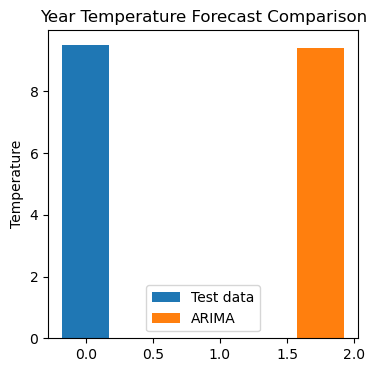

In [21]:
plt.figure(figsize=(4, 4))
bar_width = 0.35
plt.bar(test.index, test.values, width=bar_width, label='Test data')
plt.bar(forecast_arima.index + bar_width*5, forecast_arima.values, width=bar_width, label='ARIMA')
plt.ylabel('Temperature')
plt.title('Year Temperature Forecast Comparison')
plt.legend()
plt.show()

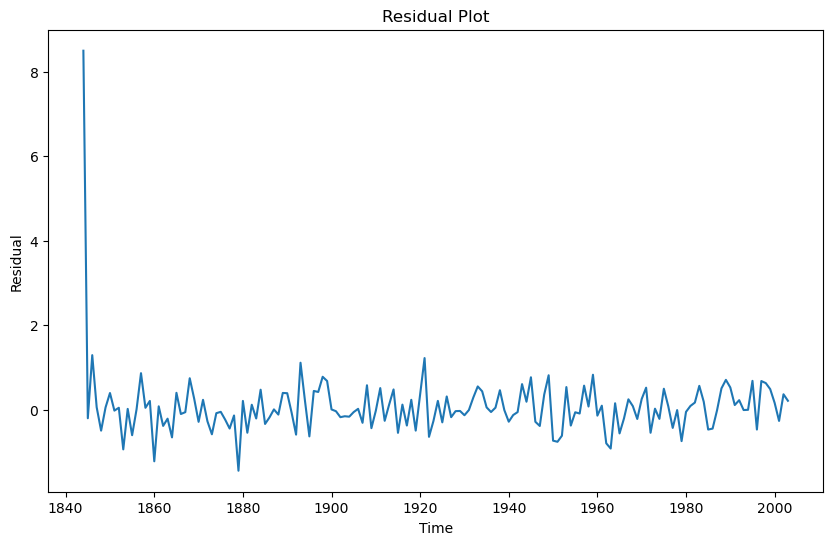

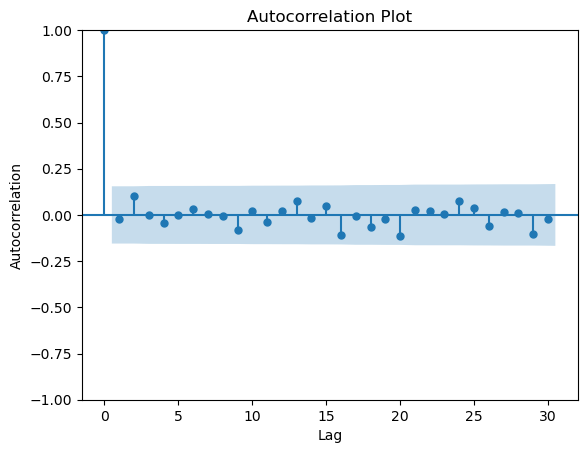

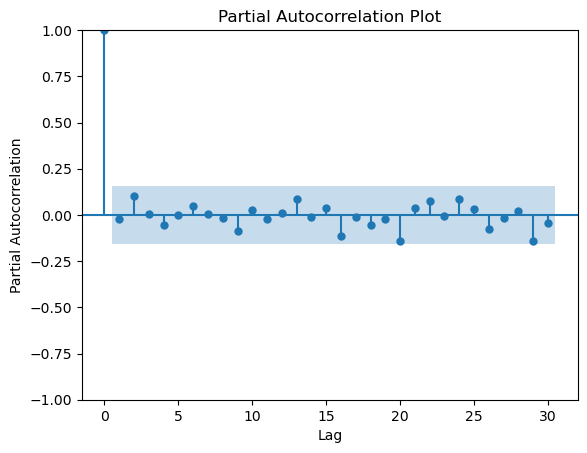

In [22]:
#Figure 11.2 and 12.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Geting the residuals
residuals = pd.Series(fit_arima.resid)

# Creating the residual plot
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

plot_acf(residuals, lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
# Creating the partial autocorrelation plot
plot_pacf(residuals, lags=30)
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [23]:
#Figure 13.2
from statsmodels.stats.stattools import jarque_bera

# Performing Jarque-Bera test
_, pvalue, _, _ = jarque_bera(residuals)
print(pvalue)
# Checking normality assumption
if pvalue < 0.05:
    print('The residuals are not normally distributed.')
else:
    print('The residuals are normally distributed.')


0.0
The residuals are not normally distributed.


In [24]:
#Figure 14.2
dwtest = durbin_watson(forecast_arima)

# Printing the Durbin-Watson statistic and p-value
print(f'Durbin-Watson statistic: {dwtest:.2f}')
if dwtest < 2 or dwtest > 4:
    print('Autocorrelation is present')

Durbin-Watson statistic: 0.00
Autocorrelation is present


In [25]:
#Figure 15.2
# forcasting for the year 2005
model_arima = ARIMA(dfy, order=(7, 2, 2))
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(len(test))

    
print('Forecasts for the next year:\n', forecast_arima)


Forecasts for the next year:
 161    9.393073
dtype: float64
